<a href="https://colab.research.google.com/github/KelvinJais/University-works/blob/main/LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Importing all the required libaries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt

Histogram of Oriented Gradients (HOG) is a technique used for feature extraction in images. It involves finding the histogram of gradients within an image, which helps identify edges and corners effectively, making it valuable for tasks like image and face detection.

HOG operates in the following five steps:

Preprocessing: The initial step involves dividing the image into patches, which can be cropped and resized if necessary. While the option of gamma correction is mentioned in the paper by Dalal and Triggs as a preprocessing step, its performance benefits are relatively minor.

Calculate Gradient Images: HOG computes the horizontal and vertical gradients in the image, capturing the variations in intensity or color. These gradients are more pronounced at locations with sharp changes in the image.

Calculate Histogram of Gradients in 8×8 Cells: The image is divided into 8×8 cells, and for each of these cells, a histogram of gradients is generated. This step helps focus on local gradient patterns.

16×16 Block Normalization: To make the histograms less sensitive to lighting variations, they are normalized within 16×16 pixel blocks.

Calculate the Histogram of Oriented Gradients Feature Vector: Each 16×16 block is represented by a 36×1 vector. These vectors are then concatenated to form a larger vector, resulting in a final feature vector with a dimensionality of 3780 (36×105).


https://learnopencv.com/histogram-of-oriented-gradients/


THIS ABOVE IS THE LINK FOR THE EXPLAINATION PLEASE GO THROUGH AND MAKE REPORT WHY CHANGING THE WORDS IF NECESSARY

In [3]:
import os
import cv2
import numpy as np
images=[]
# Define the path to the folder containing images
folder_path = '/content/Images'
for filename in os.listdir(folder_path):
  image = imread(os.path.join(folder_path, filename))
  images.append(image)

In [5]:
resized_images=[]
for img in images:
  res_image=resize(img,(250,250))
  resized_images.append(res_image)
#resized_image = resize(img, (250,250))
#resized_image=img

In [6]:
hog_images=[]
for img in resized_images:
  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=False)
  hog_images.append(hog_image)

<ipython-input-6-a9e6b583fa3f>:3: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),


In [28]:
fd, hog_image = hog(img2, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=False)

<ipython-input-28-5d1c4f7192e3>:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img2, orientations=9, pixels_per_cell=(8, 8),


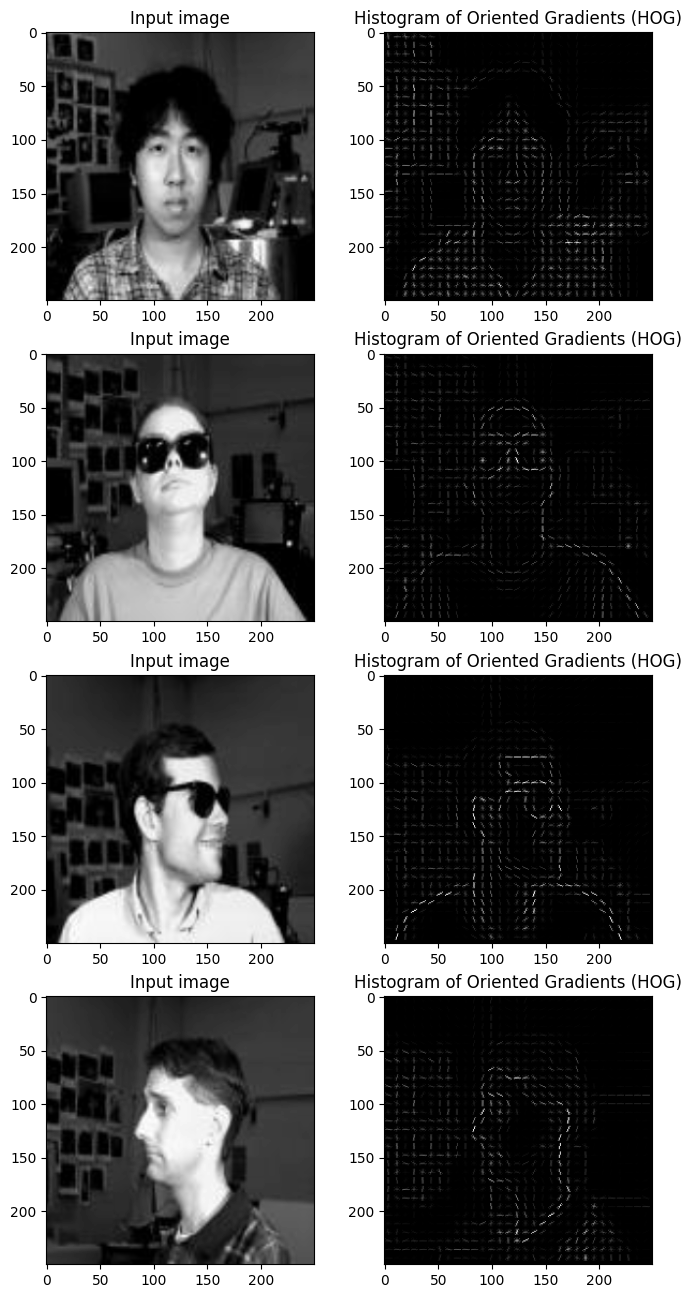

In [29]:
fig, axs = plt.subplots(4, 2, figsize=(8, 16))
i=-1

for img,hog in zip(resized_images,hog_images):
  i+=1
  axs[i,0].imshow(img,cmap=plt.cm.gray)
  axs[i][0].set_title('Input image')
  hog_image_rescaled = exposure.rescale_intensity(hog, in_range=(0, 10))
  axs[i][1].imshow(hog_image_rescaled, cmap=plt.cm.gray)
  axs[i][1].set_title('Histogram of Oriented Gradients (HOG)')
plt.show()


In [ ]:
# Importing required libraries.

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [ ]:
## Importing both images

img1 = cv.imread('add pictures',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('add pictures ',cv.IMREAD_GRAYSCALE)

https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html THIS IS THE SOURCE OF THE INFOMATION , JUST MAKE SURE YOU READ IT ONCE AND PARAPHASE IS REQUIRED FOR THE REPORT ON SUBMISSION ON SATURDAY AND FOR MILESTONE REPORT

Scale-Invariant Feature Transform (SIFT) is a method for extracting distinctive features from images. It employs five key techniques:

Scale-Space Extrema Detection:

Utilizes scale-space filtering by finding the

1.   Utilizes scale-space filtering by finding the Laplacian of Gaussian for the image with various σ values
2.The LoG acts as a blob detector, detecting blobs of different sizes based on the σ value, acting as a scaling parameter   

Keypoint Localization:

1.   Refines potential keypoint locations by using a Taylor series expansion of the scale space for more accurate results.
2. Rejects keypoints with intensity below a threshold value.
3. Discards keypoints based on a ratio test. If this ratio is greater than a threshold (referred to as edgeThreshold in OpenCV), the keypoint is discarded. This filtering process eliminates low-contrast and edge keypoints, leaving only strong interest points.

Orientation Assignment:


1. Assigns an orientation to each keypoint to ensure invariance to image rotation.

2. A local region around the keypoint location, determined by the scale, is considered

3.  Calculates the gradient magnitude and direction in this region
4. Constructs an orientation histogram with 36 bins covering 360 degrees, weighted by gradient magnitude and a Gaussian-weighted circular window with σ equal to 1.5 times the keypoint's scale  
5. The highest peak in the histogram is selected, and other peaks above 80% of the highest peak are also considered. This creates keypoints with the same location and scale but different directions, enhancing matching stability

Keypoint Descriptor:

Creates a keypoint descriptor by capturing a 16x16 neighborhood around the keypoint.
Divides this neighborhood into 16 sub-blocks of size 4x4.
For each sub-block, an 8-bin orientation histogram is generated, resulting in a total of 128 bin values.
These bin values are represented as a vector, forming the keypoint descriptor.
Additionally, measures are incorporated to enhance robustness against illumination changes, rotation, and other variations.


Keypoint Matching:

Matches keypoints between two images by identifying their nearest neighbors.
Applies a ratio test to reject potential matches where the ratio of the closest-distance to the second-closest distance is greater than 0.8.
This approach helps eliminate approximately 90% of false matches while retaining about 5% of correct matches.


In [ ]:
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints with SIFT
kp = sift.detect(img1,None)
# compute the descriptors with SIFT
kp, des = sift.compute(img1, kp)
# draw only keypoints location,not size and orientation
imgResult = cv.drawKeypoints(img1, kp, None, color=(255,0,0), flags=0)

plt.title('Original Image 1')
plt.imshow(img1)
plt.show()

plt.title('SIFT Algorithm for image 1')
plt.imshow(imgResult)
plt.show()